In [79]:
import numpy as np
import seaborn as sns
import pandas as pd

Implementation of exponentially and logarithmically growing bin size for ord-vector.

Parameters can be optimized in outer-loop with Optuna, for example.

Eqn. 1, exponential growth: $N(t) = \lfloor N_0 \exp(at) + 1/2 \rfloor$

Eqn. 2, logarithmic growth: $N(t) = \lfloor N_0 + a \ln(t/b + 1) + 1/2 \rfloor$

where $N_0$ is the initial bin size and $a$ and $b$ are parameters affecting the growth rates.

Note: adding 1/2 and flooring to round to nearest integer.

**Sketch of algorithm**
1. Use eqn. 1 or 2 to define the bin size and continue taking bins until out of data.
2. If final bin bleeds over, merge it with the penultimate bin.

Hard to implement efficiently in Python/NumPy, but this might ok since we shouldn't be making that many bins. Potential alternative: use pandas exponential weighted functions?

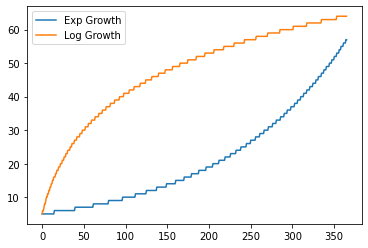

In [66]:
# N(t) = n0 * exp(-at)
t = np.linspace(0, 365, num=int(5e2))
n0 = 5
a = 1/150
n1=5
b=20
c=20
exp_grow = lambda t,n0,a: n0*np.exp(a*t)
log_grow = lambda t,n0,a,b: n0 + a*np.log(t/b + 1)
weight = exp_grow(t,n0,a)
sns.lineplot(x=t, y=weight.round(), label='Exp Growth')
sns.lineplot(x=t, y=log_grow(t,n1,b,c).round(), label='Log Growth');

<AxesSubplot:>

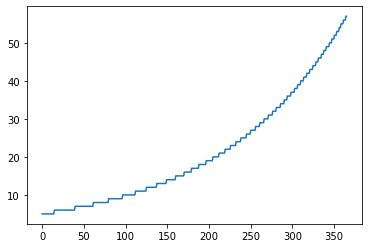

In [91]:
sizes = weight.round()
sns.lineplot(x=t, y=sizes)

In [ ]:
def get_exp_grow_bins(t, n0, a):
    assert (n0 - 1) > 1, "Need a minimum binwidth (n0 - 1) > 0."
    sizes = exp_grow(t, n0, a).round()
    starts = []
    ends = []
    i = 0
    while i < len(t):
        starts.append(i)
        ends.append(i+sizes[i])
        i += sizes[i]
    if i != len(t) - 1:
        ends[-1] = len(t) - 1
    # for s,e in zip(starts, ends):
    #     vals.append(agg(x[s:e]))